# Neural Survivor

## Pre-reqs

In [1]:
# Load the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Load the input files
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

## Fixing the Data

### Finding the Null values

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Discarding data

In [5]:
"""
Discard un-necessary or improper data

Passenger ID, Name or Ticket: These are not relevant to survival, so we can discard them
Cabin: This has too many null values and hence cannot be used well, even though this might
be critical to survival!
"""
train_data = train_data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
test_data = test_data.drop(['Name', 'Cabin', 'Ticket'], axis=1)

### Fixing Age

In [6]:
# get average, std, and number of NaN values in titanic_df
average_age_train   = train_data["Age"].mean()
std_age_train       = train_data["Age"].std()
count_nan_age_train = train_data["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_data["Age"].mean()
std_age_test       = test_data["Age"].std()
count_nan_age_test = test_data["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(
    average_age_train - std_age_train, 
    average_age_train + std_age_train, 
    size = count_nan_age_train)
rand_2 = np.random.randint(
    average_age_test - std_age_test, 
    average_age_test + std_age_test, 
    size = count_nan_age_test)

# fill NaN values in Age column with random values generated
train_data["Age"][np.isnan(train_data["Age"])] = rand_1
test_data["Age"][np.isnan(test_data["Age"])] = rand_2

# convert from float to int
train_data['Age']    = train_data['Age'].astype(int)
test_data['Age']     = test_data['Age'].astype(int)


del average_age_train
del std_age_train
del count_nan_age_train
del average_age_test
del std_age_test
del count_nan_age_test
del rand_1
del rand_2

/home/karti/.conda/envs/openai/lib/python3.5/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/karti/.conda/envs/openai/lib/python3.5/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Fixing Fare

In [7]:
# only for test_df, since there is a missing "Fare" values
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

# convert from float to int
train_data['Fare']   = train_data['Fare'].astype(int)
test_data['Fare']    = test_data['Fare'].astype(int)

### Fixing Embarked

In [8]:
# Fill empty embarked values with the most common value
common_embark = train_data.Embarked.value_counts().idxmax(axis=1)
train_data["Embarked"] = train_data["Embarked"].fillna(common_embark)
del common_embark

### Check that the data is now fixed

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
Embarked    891 non-null object
dtypes: int64(6), object(2)
memory usage: 55.8+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
Embarked       418 non-null object
dtypes: int64(6), object(2)
memory usage: 26.2+ KB


## Re-formatting the data

In [11]:
# Maps
sex_map = {'male': 0, 'female': 1}
embark_map = {'S': 0, 'C': 1, 'Q': 2}

In [12]:
# Change all the string values to int
train_data['Sex'].replace(sex_map, inplace=True)
train_data['Embarked'].replace(embark_map, inplace=True)
test_data['Sex'].replace(sex_map, inplace=True)
test_data['Embarked'].replace(embark_map, inplace=True)
del sex_map
del embark_map

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
Embarked    891 non-null int64
dtypes: int64(8)
memory usage: 55.8 KB


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
Embarked       418 non-null int64
dtypes: int64(8)
memory usage: 26.2 KB


## Data

In [15]:
X_train = train_data.drop(['Survived'],axis=1).values
y_train = train_data['Survived'].values
X_test = test_data.drop(['PassengerId'],axis=1).values

## Model

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

Using TensorFlow backend.


In [17]:
dropout = 0.2
epochs = 10000
lr = 1e-4

In [18]:
# Form the model
model = Sequential()
model.add(Dense(16, input_shape=(7,), activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(32, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(32, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(16, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(8, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(4, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(2, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
__________

In [19]:
# Compile and build the model
model.compile(optimizer=Adam(lr=lr),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
# Define callbacks
cbk_ckpt = ModelCheckpoint('../models/best.hdf5', save_best_only=True)
cbk_stop = EarlyStopping(patience=100)

In [21]:
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(
    X_train,
    y_train, 
    epochs=epochs, 
    batch_size=1024,
    validation_split=0.2,
    #callbacks=[cbk_ckpt, cbk_stop],
    verbose=0)

max(history.history['val_acc'])

0.82681566476821899

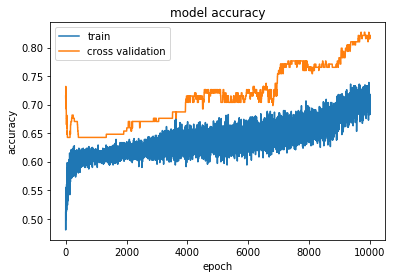

In [22]:
# Plot the training & validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'cross validation'], loc='upper left')
plt.show()

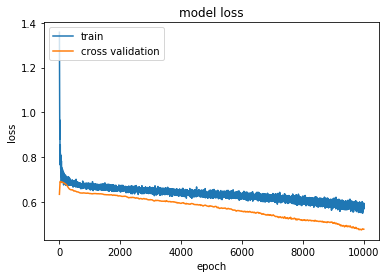

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'cross validation'], loc='upper left')
plt.show()